In [1]:
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions
from copy import deepcopy
from sklearn.metrics import mean_absolute_error, mean_squared_error, plot_confusion_matrix, roc_curve, auc, RocCurveDisplay, classification_report

# Poniższe dla MLP

a. wziąć konkretne dane, podzielić na część treningową i testową lub uczyć wg. schematu walidacji krzyżowej

In [2]:
X, y= ds.make_classification(n_samples=5000, n_features=2, n_classes=2, n_clusters_per_class=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=0)
print(X.shape)
print(y.shape)

(5000, 2)
(5000,)


Dla takiej ilości danych (parę tysięcy) robiony train test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

b. zwrócić uwagę na hiperparametry modelu i spróbować znaleźć optymalne

In [4]:
mlp = MLPClassifier()
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Najlepszym wyjściem będzie zastosowanie algorytmu do automatycznego szukania najlepszej kombinacji hiperparametrów - na przykład GridSearchCV z sklearn

In [5]:
hyperparams = {
    'activation': ('relu', 'tanh'),
    'hidden_layer_sizes': ((10,), (20,)),
    'solver': ('sgd', 'adam'),
    'learning_rate_init': (0.1, 0.01),
    'max_iter': (10, 20), 
    'tol': (0.0001, 0.001)
}

hidden_layer_sizes i max_iter specjalnie zostały zawężone do tak małych wartości, aby łatwiej było przedstawić wymienione rzeczy z punktów c i d

przy szukaniu rzeczywiście najlepszych hyperparametrów, obszar poszukiwań należałoby zdecydowanie poszerzyć

In [6]:
grid = GridSearchCV(estimator=mlp, param_grid=hyperparams, cv=5)
grid.fit(X, y)
grid.best_params_

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mch

{'activation': 'relu',
 'hidden_layer_sizes': (20,),
 'learning_rate_init': 0.1,
 'max_iter': 20,
 'solver': 'adam',
 'tol': 0.001}

In [7]:
mlp = MLPClassifier(**grid.best_params_, verbose=True)
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.1,
 'max_fun': 15000,
 'max_iter': 20,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

c. zwrócić uwagę na parametry uczone: wyświetlać ich wartości i gradienty co epokę

d. zwizualizować (co epokę, jeśli maksymalnie dwie cechy): dane, hiperpłaszczyznę klasyfikacji (zinterpretować z czego wynika jej kształt), wartość straty

gradientów co epokę nie da się wyświetlić dla żadnego z modelów z sklearn przy pomocy wbudowanych metod

dla c, d:

- wyświetlanie wartości parametrów uczonych

In [8]:
preds = []
mlps = [mlp]
for epoch in range(mlp.max_iter):
    # partial_fit is only available for stochastic optimizers. lbfgs is not stochastic.
    mlp.partial_fit(X_train, y_train, classes=[0, 1])
    mlps.append(deepcopy(mlp))
    y_pred = mlp.predict(X_test)
    preds.append(y_pred)
    print(f'Epoka {epoch + 1}:')
    print(f'Wagi:\n{mlp.coefs_}')
    print(f'Bias wektor:\n{mlp.intercepts_}')
    print('\n')

Iteration 1, loss = 0.16238450
Epoka 1:
Wagi:
[array([[-1.17374717, -0.59614908,  1.19821947, -0.11401077, -0.199921  ,
         0.40813666,  1.072215  ,  1.14200737, -0.83511708,  0.93653159,
         1.3667296 ,  0.61741083, -0.68573624, -0.93865001, -1.04394162,
        -0.99976505, -1.10093558, -0.27956151,  0.41826305, -0.42891257],
       [-1.35629878,  0.4397458 , -0.41417607, -0.08802725,  0.35032558,
         0.4078398 , -0.23767336, -0.72087104, -0.85935362, -0.17860858,
        -0.70484408,  0.55623109,  0.9536347 ,  0.79207674, -0.21453925,
         0.21058521, -0.89034979,  0.363672  ,  0.78284137,  0.6428733 ]]), array([[-1.05657264],
       [ 0.21536869],
       [ 1.26198968],
       [ 0.55060118],
       [ 0.18007476],
       [ 0.48637986],
       [ 0.83396853],
       [ 0.87378294],
       [-0.70753845],
       [ 1.08798638],
       [ 1.07703914],
       [ 0.1775168 ],
       [-1.02199893],
       [-0.88711429],
       [-0.98241346],
       [-0.84235244],
       [-1.02

- wizualizacja co epokę funkcji straty

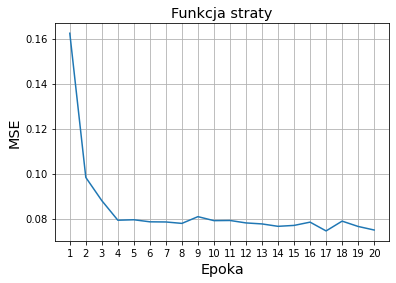

In [9]:
plt.plot(list(range(1, mlp.max_iter + 1)), mlp.loss_curve_)
plt.title('Funkcja straty', fontsize='x-large')
plt.xlabel('Epoka', fontsize='x-large')
plt.xticks(np.arange(1, mlp.max_iter + 1, step=1))
plt.ylabel('MSE', fontsize='x-large')
plt.grid()
plt.show()

- wizualizacja co epokę hiperpłaszczyzny klasyfikacji (zinterpretować z czego wynika jej kształt) i danych

    hiperpłaszczyzna zależy od liczby cech - jeśli będą dwie (tak jak w tym przypadku), to hiperpłaszczyzna będzie linią
    
Jeśli chodzi o rysowanie, to na szczęście bogactwo bibliotek pythonowych przyszło z pomocą: plot_decision_regions to funkcja dla wyświetlania hiperpłaszczyzn klasyfikacji w 1 lub 2 wymiarach

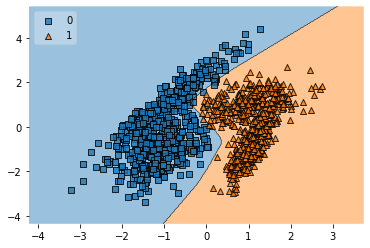

In [10]:
def show_classification_hyperplane(epoch):
    plot_decision_regions(X_test, preds[epoch], clf=mlps[epoch], legend=2)

show_classification_hyperplane(4)

e. na danych testowych wyliczyć różne metryki uczenia

In [11]:
y_pred = mlp.predict(X_test)

mean_absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error = mean_squared_error(y_test, y_pred)

print('mean_absolute_error:', mean_absolute_error)
print('mean_squared_error:', mean_squared_error)

mean_absolute_error: 0.0208
mean_squared_error: 0.0208


C:\Users\mcham\anaconda3\envs\tf-gpu-280\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


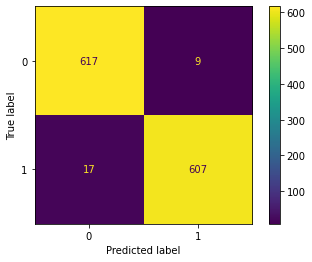

In [12]:
plot_confusion_matrix(mlp, X_test, y_test)

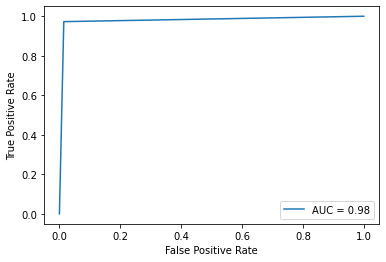

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

In [14]:
target_names = [f'class {class_i}' for class_i in np.unique(y)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98       626
     class 1       0.99      0.97      0.98       624

    accuracy                           0.98      1250
   macro avg       0.98      0.98      0.98      1250
weighted avg       0.98      0.98      0.98      1250

